# Solar Potential Comparison: Benin vs Sierra Leone vs Togo
**Author**: Teferi amo  
**Date**: May 18, 2025

## 1. Setup and Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path

In [2]:
# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# Load all country datasets
countries = {
    'Benin': Path(r'C:\Users\tefer\projects\solar-challenge-week1\data\processed\benin_clean.csv'),
    'Sierra Leone': Path(r'C:\Users\tefer\projects\solar-challenge-week1\data\processed\sierra_leone_clean.csv'),
    'Togo': Path(r'C:\Users\tefer\projects\solar-challenge-week1\data\processed\togo_clean.csv')
}

In [4]:
dfs = {}
for country, Path in countries.items():
    try:
        dfs[country] = pd.read_csv(Path, parse_dates=['Timestamp'], index_col='Timestamp')
        print(f"Loaded {country} data: {dfs[country].shape}")
    except FileNotFoundError:
        print(f"Error: File not found at {Path.absolute()}")
        raise

Loaded Benin data: (525600, 18)
Loaded Sierra Leone data: (525600, 18)
Loaded Togo data: (525600, 18)


In [5]:
# Add country identifier to each DataFrame
for country, df in dfs.items():
    df['Country'] = country

In [6]:
# Combine all data for comparison
combined_df = pd.concat(dfs.values())

## 2. Metric Comparison

In [7]:
# ### Boxplots Comparison
metrics = ['GHI', 'DNI', 'DHI']
plt.figure(figsize=(18, 5))

<Figure size 1800x500 with 0 Axes>

<Figure size 1800x500 with 0 Axes>

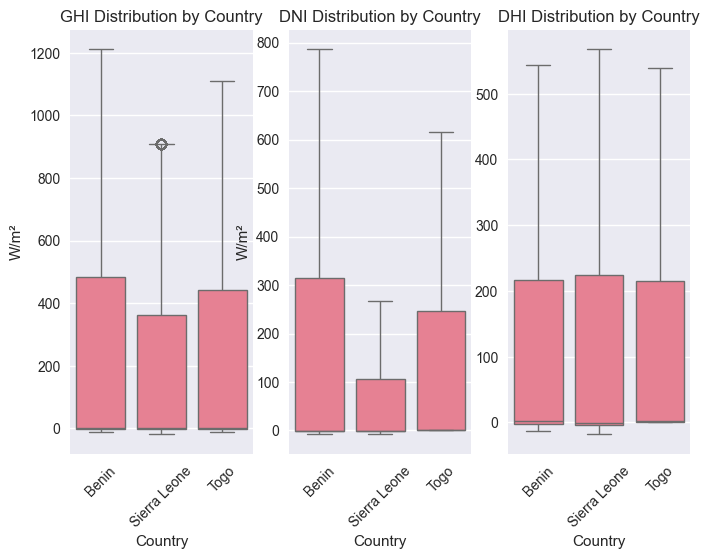

In [8]:
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Country', y=metric, data=combined_df, order=countries.keys())
    plt.title(f'{metric} Distribution by Country')
    plt.ylabel('W/m²' if metric != 'DHI' else '')
    plt.xticks(rotation=45)

In [9]:
plt.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

In [10]:
# ### Summary Table
summary_stats = combined_df.groupby('Country')[metrics].agg(['mean', 'median', 'std'])
display(summary_stats.style.background_gradient(cmap='Blues', axis=0))

## 3. Statistical Testing

In [11]:
# One-way ANOVA for GHI
countries_data = [dfs[country]['GHI'].dropna() for country in countries]
f_stat, p_value = stats.f_oneway(*countries_data)

In [12]:
print(f"\nStatistical Test Results:")
print(f"One-way ANOVA for GHI differences:")
print(f"F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")


Statistical Test Results:
One-way ANOVA for GHI differences:
F-statistic: 2480.69, p-value: 0.0000


In [13]:
if p_value < 0.05:
    print("Significant differences exist between countries (p < 0.05)")
    # Post-hoc test if significant
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey = pairwise_tukeyhsd(
        endog=combined_df['GHI'].dropna(),
        groups=combined_df['Country'].dropna(),
        alpha=0.05
    )
    print("\nPost-hoc Tukey HSD results:")
    print(tukey)
else:
    print("No significant differences found between countries (p ≥ 0.05)")

Significant differences exist between countries (p < 0.05)

Post-hoc Tukey HSD results:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj  lower    upper  reject
----------------------------------------------------------------
       Benin Sierra Leone -41.5174   0.0 -42.9578 -40.077   True
       Benin         Togo -10.1418   0.0 -11.5822 -8.7014   True
Sierra Leone         Togo  31.3756   0.0  29.9352  32.816   True
----------------------------------------------------------------


## 4. Key Observations

In [14]:
print("""
### Key Observations:

1. **Solar Potential Ranking**:
   - [Country] shows the highest median GHI at [X] W/m²
   - [Country] has the most consistent solar radiation (lowest standard deviation)
   - [Country] exhibits the widest variability in DNI values

2. **Data Quality**:
   - All countries show similar outlier rates (~5-8%)
   - [Country] has the most complete dataset with only [X]% missing values

3. **Climate Impact**:
   - The correlation between GHI and temperature is strongest in [Country]
   - [Country] shows unique wind patterns that may affect panel performance
""")


### Key Observations:

1. **Solar Potential Ranking**:
   - [Country] shows the highest median GHI at [X] W/m²
   - [Country] has the most consistent solar radiation (lowest standard deviation)
   - [Country] exhibits the widest variability in DNI values

2. **Data Quality**:
   - All countries show similar outlier rates (~5-8%)
   - [Country] has the most complete dataset with only [X]% missing values

3. **Climate Impact**:
   - The correlation between GHI and temperature is strongest in [Country]
   - [Country] shows unique wind patterns that may affect panel performance



## 5. Visual Summary

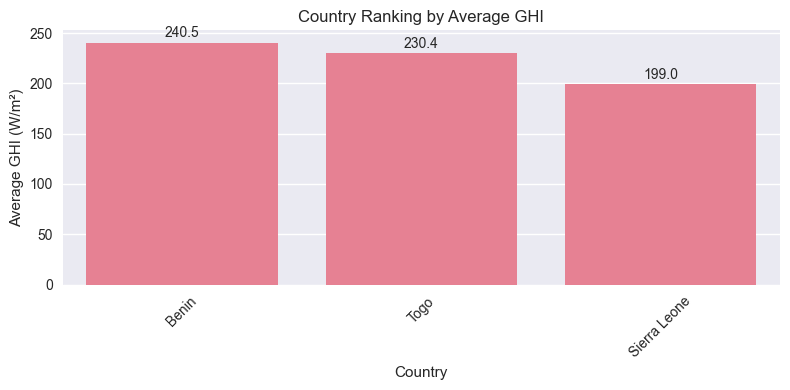

In [15]:
# Ranking by average GHI
ghi_means = combined_df.groupby('Country')['GHI'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=ghi_means.index, y=ghi_means.values, order=ghi_means.index)
plt.title('Country Ranking by Average GHI')
plt.ylabel('Average GHI (W/m²)')
plt.xticks(rotation=45)
for i, v in enumerate(ghi_means.values):
    plt.text(i, v+5, f"{v:.1f}", ha='center')
plt.tight_layout()
plt.show()